In [1]:
import nmd
import csv
import numpy as np
import pandas as pd
import common
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
notebook_prefix = '007_Manipulate_Classification_Data'
data_folder = os.path.join(common.DATA_FOLDER, notebook_prefix)
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_prefix)

! mkdir $data_folder
! mkdir $figure_folder

In [4]:
filename = os.path.join(common.DATA_FOLDER, '005_Generate_Classifications_From_Targets', 'all_nmd_classifications.csv')
all_nmd_targets = pd.read_csv(filename)

In [5]:
all_nmd_targets.head()

,exon_id,filename_of_origin,nmd_classification
0,exon:chr10:101510126-101510153:+,ipsc_npc_mn_regression_targets.csv,Exclusion causes NMD (annotated)
1,exon:chr10:101935702-101935827:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Splicing not known to cause NMD
2,exon:chr10:103221738-103221815:+,correlated_actual_filtered_targets.csv,Splicing not known to cause NMD
3,exon:chr10:103343345-103343438:-,UPF1_K562_SE.MATS.ReadsOnTargetAndJunctionCoun...,Exon not found
4,exon:chr10:103343345-103343438:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exon not found


In [6]:
all_nmd_targets.groupby(['nmd_classification']).size()

nmd_classification
Exclusion causes NMD (annotated)             51
Exclusion causes NMD (found stop codon)      19
Exon not found                              667
Inclusion causes NMD (annotated)             58
Inclusion causes NMD (found stop codon)      23
Splicing not known to cause NMD            1585
dtype: int64

In [7]:
all_nmd_targets.groupby(['nmd_classification', 'filename_of_origin']).size()

nmd_classification                       filename_of_origin                                           
Exclusion causes NMD (annotated)         UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv                   11
                                         UPF1_K562_SE.MATS.ReadsOnTargetAndJunctionCounts_targets.csv      11
                                         correlated_actual_filtered_targets.csv                            11
                                         ipsc_npc_mn_regression_targets.csv                                12
                                         ipsc_only_regression_targets.csv                                   6
Exclusion causes NMD (found stop codon)  UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv                    3
                                         UPF1_K562_SE.MATS.ReadsOnTargetAndJunctionCounts_targets.csv       3
                                         correlated_actual_filtered_targets.csv                             6
                 

In [8]:
size = all_nmd_targets['nmd_classification'].groupby(all_nmd_targets['nmd_classification'].astype(str)).size()
size

nmd_classification
Exclusion causes NMD (annotated)             51
Exclusion causes NMD (found stop codon)      19
Exon not found                              667
Inclusion causes NMD (annotated)             58
Inclusion causes NMD (found stop codon)      23
Splicing not known to cause NMD            1585
dtype: int64

In [9]:
size/size.sum()*100

nmd_classification
Exclusion causes NMD (annotated)            2.122347
Exclusion causes NMD (found stop codon)     0.790678
Exon not found                             27.756970
Inclusion causes NMD (annotated)            2.413650
Inclusion causes NMD (found stop codon)     0.957137
Splicing not known to cause NMD            65.959218
dtype: float64

In [10]:
rows = all_nmd_targets['filename_of_origin'].str.contains('UPF1_K562_SE.MATS.JunctionCountOnly')
rmats_junction_nmd_targets = all_nmd_targets.loc[rows]
print(rmats_junction_nmd_targets.shape)
rmats_junction_nmd_targets.head()

(742, 3)


,exon_id,filename_of_origin,nmd_classification
1,exon:chr10:101935702-101935827:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Splicing not known to cause NMD
4,exon:chr10:103343345-103343438:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exon not found
6,exon:chr10:103344635-103344676:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Splicing not known to cause NMD
9,exon:chr10:103553443-103553501:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Splicing not known to cause NMD
12,exon:chr10:103904007-103904064:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Splicing not known to cause NMD


In [11]:
rmats_counts = rmats_junction_nmd_targets.groupby(['nmd_classification']).size().reset_index()
rmats_counts = rmats_counts.rename(columns={0:"counts"})
print(rmats_counts.size)
rmats_counts.head()

12


,nmd_classification,counts
0,Exclusion causes NMD (annotated),11
1,Exclusion causes NMD (found stop codon),3
2,Exon not found,334
3,Inclusion causes NMD (annotated),9
4,Inclusion causes NMD (found stop codon),5


In [12]:
sns.set(context="paper", style="whitegrid")

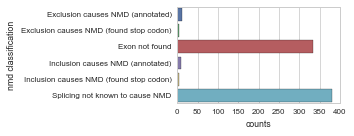

In [13]:
fig, ax = plt.subplots(figsize=(5, 2))
ax = sns.barplot(y="nmd_classification", x="counts", data=rmats_counts)
ax.set(xlabel="counts", ylabel="nmd classification")
fig.tight_layout()
png = os.path.join(figure_folder, "UPF1_KD_K562.png")
fig.savefig(png, dpi=300)

In [25]:
rmats_junction_nmd_targets.query('nmd_classification == "Exclusion causes NMD (annotated)"')

,exon_id,filename_of_origin,nmd_classification
116,exon:chr11:112100931-112100953:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
260,exon:chr12:100657275-100657671:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
548,exon:chr15:81615240-81615289:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
554,exon:chr15:85632569-85632647:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
614,exon:chr16:4774751-4774832:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
995,exon:chr19:9768685-9768811:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
1240,exon:chr1:76194074-76194173:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
1241,exon:chr1:76194086-76194173:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
1781,exon:chr4:17493855-17493963:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)
2099,exon:chr7:2608588-2608633:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (annotated)


In [15]:
rmats_junction_nmd_targets.query('nmd_classification == "Exclusion causes NMD (found stop codon)"')

,exon_id,filename_of_origin,nmd_classification
61,exon:chr10:35490379-35490414:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (found stop codon)
993,exon:chr19:9738392-9738482:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (found stop codon)
1639,exon:chr3:13524964-13525064:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Exclusion causes NMD (found stop codon)


In [16]:
rmats_junction_nmd_targets.query('nmd_classification == "Inclusion causes NMD (annotated)"')

,exon_id,filename_of_origin,nmd_classification
181,exon:chr11:533277-533358:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
235,exon:chr11:71673198-71673335:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
251,exon:chr11:86037555-86037718:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
379,exon:chr12:94253095-94253218:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
1659,exon:chr3:16313652-16313828:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
1785,exon:chr4:1913818-1913921:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
1907,exon:chr5:6644921-6645422:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
2009,exon:chr6:36446898-36447000:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)
2111,exon:chr7:33075546-33075600:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (annotated)


In [17]:
rmats_junction_nmd_targets.query('nmd_classification == "Inclusion causes NMD (found stop codon)"')

,exon_id,filename_of_origin,nmd_classification
198,exon:chr11:59992438-59992566:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (found stop codon)
279,exon:chr12:111057641-111057761:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (found stop codon)
427,exon:chr14:102744943-102745031:-,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (found stop codon)
702,exon:chr17:36916761-36916861:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (found stop codon)
2008,exon:chr6:36442566-36442839:+,UPF1_K562_SE.MATS.JunctionCountOnly_targets.csv,Inclusion causes NMD (found stop codon)
